# 와인 데이터 세트를 이용한 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

데이터 URL을 통해 데이터를 가져 읽어온다.

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv' #Data URL을 입력

In [3]:
df = pd.read_csv(data_url) # 데이터를 data frame형태로 가져온다.
df.head(2)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5


위와 같이 데이터가 ';'로 구분된 데이터 파일이다. 따라서 ';'로 구분하여 가져오자!

In [4]:
df = pd.read_csv(data_url, sep = ';') # ';'로 separate하겠다는 옵션을 붙임

df.head() # head 기본 값은 5이다.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 데이터 구조 살펴보기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


위의 값들은 non-null 즉 빈칸 없이 모두 다 채워져 있는 것을 알 수 있다!<br>
대부분 데이터 세트에 nan 값이 포함되므로 잘 체크 해야한다.<br>
다른 방법으로도 할 수 있다.

In [6]:
df.isnull() # 다른 버젼에서는 isna로도 사용

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


## 위 값에서 quality 값만 int이다. 이 값이 label이 되기 때문에 이 값을 살펴보자!

In [7]:
df['quality'].value_counts() # value_counts로 해당 label개수를 확인할 수 있다.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

와인의 품질은 0부터 10까지 인데 여기서는 특정 값만 분포하고 있는 것을 확인할 수 있다

데이터의 분포를 matplot을 사용하여 plot해보자

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

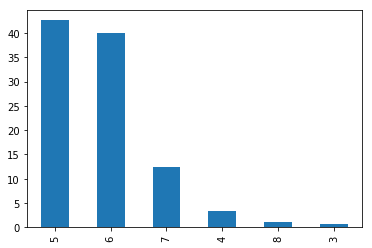

In [9]:
(df['quality'].value_counts()/len(df['quality']) *100).plot(kind='bar')
plt.show()

describe() 메서드를 사용하여 숫자 특성의 요약 정보를 살펴보자!

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


describe()를 통해 여러 값들을 알 수 있다. 여기서 25%, 50%, 75%는 백분위수(백분율이 속하는 하위 부분의 값)이다.

백분위수는 fixed acidity로 예를 들면, 25%가 7.1보다 하위에 속하고 50% 즉 반 이하가 7.9이하 값을 가진다는 의미

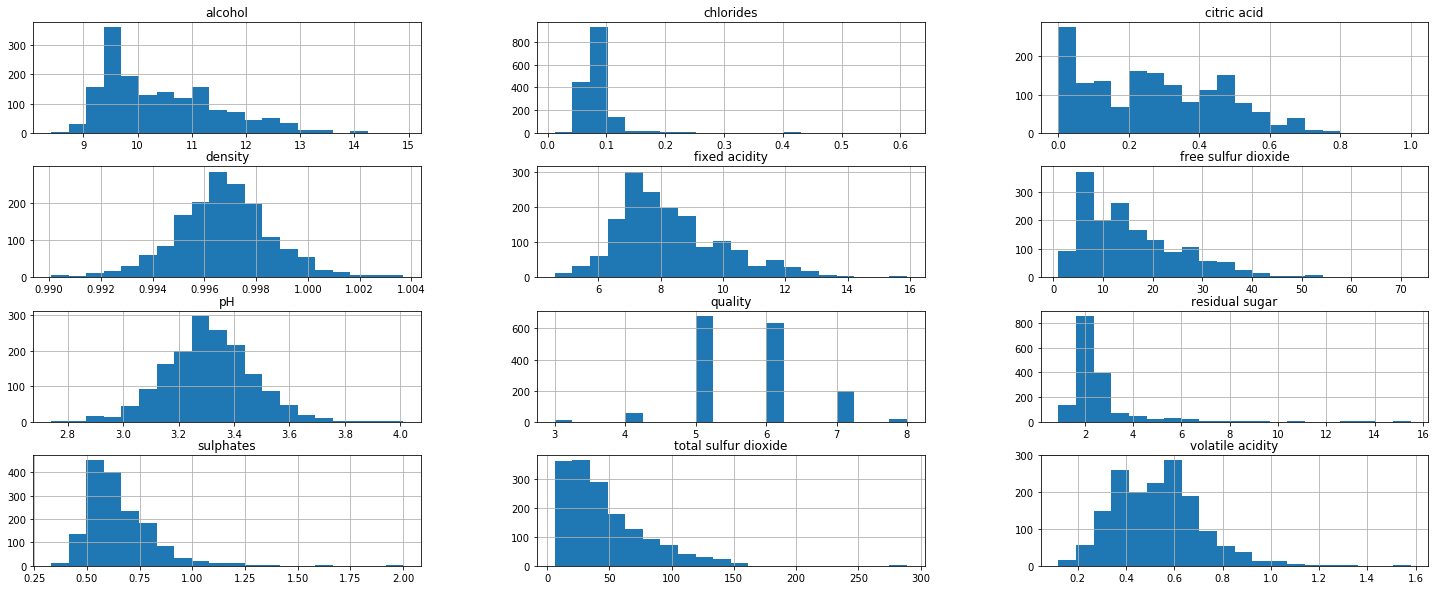

In [11]:
df.hist(bins = 20,figsize = (25,10)) # bins는 구간의 경계값 리스트를 의미
plt.show()

다음은 seaborn을 이용하여 각 특성별 quality 분포를 살펴보자<br>
위의 히스토그램의 경우에는 quality를 고려하지 않은 순수 각 특성별 분포이며, 밑의 그림은 quality를 고려한 각 특성의 데이터 분포

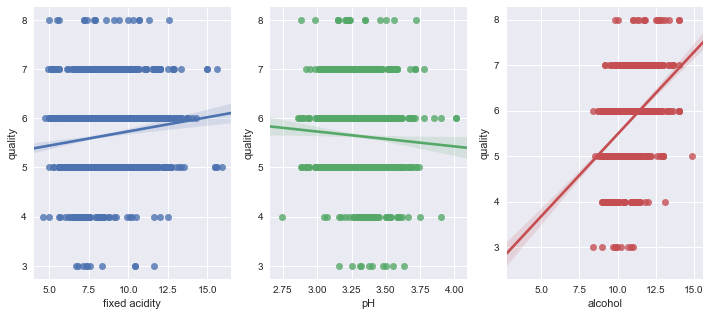

In [12]:
import seaborn as sn

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="fixed acidity", y="quality", data=df,ax=ax1)
sn.regplot(x="pH", y="quality", data=df,ax=ax2)
sn.regplot(x="alcohol", y="quality", data=df,ax=ax3)
plt.show()

# 데이터 셋 설정 및 상관 관계 분석

우선 데이터 셋을 나누기 전에 label값을 0(품질 나쁨)과 1(품질 좋음)으로 나눠 이진화 분류로 바꿔보겠다.<br>
6이상은 품질 좋음 이하는 나쁨

In [13]:
def make_label(y):
    if y > 5:
        return 1
    else:
        return 0

In [14]:
df['quality'] = df.quality.apply(make_label)
df['quality']

0       0
1       0
2       0
3       1
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      1
20      1
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      1
       ..
1569    1
1570    1
1571    1
1572    0
1573    1
1574    1
1575    1
1576    1
1577    1
1578    1
1579    0
1580    1
1581    0
1582    0
1583    0
1584    1
1585    1
1586    1
1587    1
1588    1
1589    0
1590    1
1591    1
1592    1
1593    1
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


label분리하기

In [16]:
df_label = df.pop('quality')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


데이터 나누기 전에 상관관계표

In [17]:
corr_mat = df.corr()

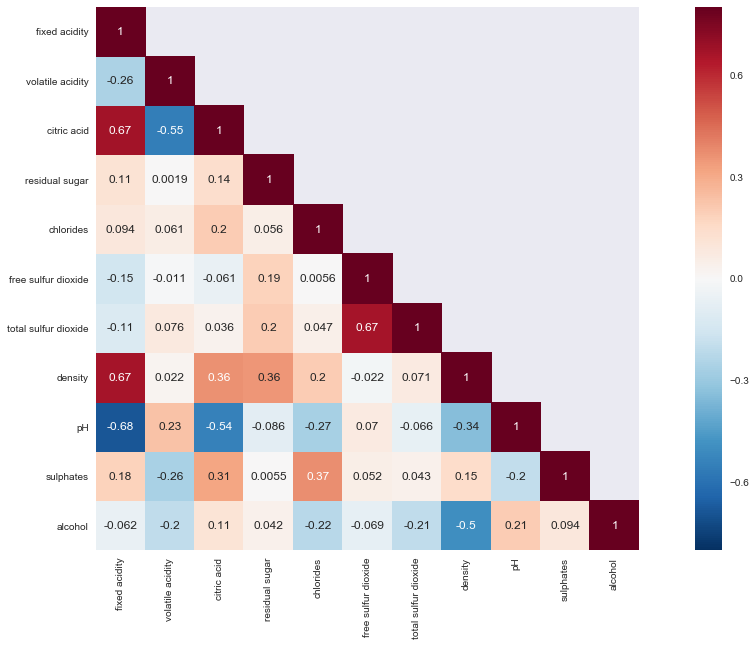

In [18]:
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr_mat, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

# 데이터 세트 나누기

In [19]:
trainX, testX = train_test_split(df, test_size = 0.5, random_state=50)
trainY, testY = train_test_split(df_label, test_size = 0.5, random_state=50)

# 로지스티 회귀 모델

In [20]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression() # 로지스틱 회귀 모델을 불러옴
cls.fit(trainX,trainY) # 데이터와 라벨을 불러와서 학습

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
cls.intercept_

array([-1.15333399])

In [22]:
cls.coef_

array([[-0.02608844, -3.41384568, -0.59467993, -0.02375563, -1.45595519,
         0.02168091, -0.0212826 , -1.13788722, -1.23052716,  1.54832151,
         0.82995072]])

In [23]:
pred_train = cls.predict(trainX.values)
predY = cls.predict(testX.values)

In [24]:
acc = (np.sum(predY==testY)/len(testY))*100
acc_train = (np.sum(pred_train==trainY)/len(trainY))*100

In [25]:
print("test정확도 : {d}%".format(d=acc))

test정확도 : 72.75%


In [26]:
print("train 정확도 : {d}%".format(d=acc_train))

train 정확도 : 76.59574468085107%


# KNN사용

In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [28]:
clf.fit(trainX, trainY)
print("3-NN 학습 세트 예측: {}".format(np.sum(trainY==clf.predict(trainX))/len(trainY)))
print("3-NN 테스트 세트 예측: {}".format(np.sum(testY==clf.predict(testX))/len(testY)))

3-NN 학습 세트 예측: 0.8122653316645807
3-NN 테스트 세트 예측: 0.64875


# SVM 사용

In [29]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# C는 마진 폭을 조절한다.
# SVM 모델이 과대적합이라면 C를 감소시켜 모델을 규제할 수 있다.
# C가 클수록 폭이 좁고 soft margin에 가까워 짐
svm_clf = Pipeline([('scaler', StandardScaler()),('linear_svc', LinearSVC(C=1, loss = 'hinge'))])

svm_clf.fit(trainX, trainY)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [30]:
print('SVM(Linear) test 정확도 : ', np.sum(svm_clf.predict(testX)==testY)/len(testY) * 100)

SVM(Linear) test 정확도 :  72.875


RBF커널

In [31]:
from sklearn.svm import SVC

# gamma는 크면 방사가 좁아지고 작으면 넓은 방사모양을 만듬
# gamma가 작은 값=> 결정 경계가 부드러워짐 넓은 방사모양
# 과적합일 경우 gamma값을 줄인다
svm_clf_rbf = Pipeline([('scaler', StandardScaler()),
                        ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 1))])

svm_clf_rbf.fit(trainX, trainY)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [32]:
print('SVM(RBF) test 정확도 : ', np.sum(svm_clf_rbf.predict(testX)==testY)/len(testY) * 100)

SVM(RBF) test 정확도 :  59.875


Poly 커널

In [33]:
# degree는 차수, coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절
# C는 linear와 마찬가지
svm_clf_poly = Pipeline([('scaler', StandardScaler()),
                        ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C=5))])

svm_clf_poly.fit(trainX, trainY)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [34]:
print('SVM(poly) test 정확도 : ', np.sum(svm_clf_poly.predict(testX)==testY)/len(testY) * 100)

SVM(poly) test 정확도 :  73.625


# SVM 파라미터 tuning사용하여 최고의 파라미터 조합을 찾자

### GridSearchCV, RandomizedSearchCV 사용해보자!

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# refer to https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
# refer to https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_parameter_tuning_grid_search/
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    
    return grid_search

def svc_param_selection_poly(X, y, nfolds):
    Cs = [0.01,1]
    degree = [3,4]
    coef0 = [1]
    param_grid = {'C': Cs, 'degree' : degree, 'coef0' : coef0}
    grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    
    return grid_search

In [58]:
def svc_param_selection_random(X, y, nfolds):
    Cs = uniform(0.1, 5000)
    gammas = uniform(0.0001, 1)
    param_rand = {'C': Cs, 'gamma' : gammas}
    rand_search = RandomizedSearchCV(SVC(kernel='rbf'), param_rand, cv=nfolds, n_iter = 100)
    rand_search.fit(X, y)
    
    return rand_search

## SVM poly의 경우 scaler로 표준화 시키는 것이 좋다? 안하면 너무 시간이 오래걸린다...

In [42]:
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)

GridSearchCV

In [43]:
# rbf
result_rbf = svc_param_selection(trainX, trainY, 2)

print('Best score for RBF:', result_rbf.best_score_) 
print('Best C:',result_rbf.best_estimator_.C) 
print('Best Kernel:',result_rbf.best_estimator_.kernel)
print('Best Gamma:',result_rbf.best_estimator_.gamma)

# poly
result_poly = svc_param_selection_poly(trainX, trainY, 2)

print('Best score for poly:', result_poly.best_score_) 
print('Best C:',result_poly.best_estimator_.C) 
print('Best Kernel:',result_poly.best_estimator_.kernel)
print('Best degree:',result_poly.best_estimator_.degree)

Best score for RBF: 0.76846057572
Best C: 1
Best Kernel: rbf
Best Gamma: 0.01
Best score for poly: 0.753441802253
Best C: 0.01
Best Kernel: poly
Best degree: 4


RandomizedSearchCV

In [59]:
# rbf_randomizedSearchCV
result_rand = svc_param_selection_random(trainX, trainY, 2)

print('Best score for rand_rbf:', result_rand.best_score_) 
print('Best C:',result_rand.best_estimator_.C) 
print('Best Kernel:',result_rand.best_estimator_.kernel)
print('Best degree:',result_rand.best_estimator_.degree)

Best score for rand_rbf: 0.772215269086
Best C: 1838.83525428
Best Kernel: rbf
Best degree: 3


이것도 위와 같은 과정 함수를 사용하지 않았을 경우이다.

In [47]:
parameter_candidates = [
  {'C': [1, 10], 'kernel': ['linear']},
  {'C': [1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1, cv=2)

# Train the classifier on data1's feature and target data
clf.fit(trainX, trainY) 
print('Best score for data:', clf.best_score_) 

Best score for data: 0.758448060075


In [48]:
print('Best score :', clf.best_score_) 
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best score : 0.758448060075
Best C: 10
Best Kernel: linear
Best Gamma: auto


# 교차 검증을 사용

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

scores = cross_val_score(cls, trainX, trainY,scoring='neg_mean_squared_error', cv=5)

In [50]:
print('Just train 에러 : ',mean_squared_error(pred_train, predY[:-1])) # -1은 둘의 개수가 안 맞아서 하나 빼준거
print('교차 검증 에러 : ',np.sqrt(-scores))

Just train 에러 :  0.523153942428
교차 검증 에러 :  [ 0.45414755  0.44017042  0.49371044  0.49371044  0.54944226]
